
# 📊 Wikipédia Cikkek Kategorizálási Elemzése

Ez a Jupyter Notebook a kategorizált Wikipédia cikkek elemzésére szolgál.  
A következő vizualizációkat és statisztikai elemzéseket tartalmazza:

✅ **Adathalmaz betöltése és megtekintése**  
✅ **Kategóriák eloszlásának vizsgálata**  
✅ **Diagramok (oszlopdiagram, kördiagram)**  
✅ **Szófelhők generálása a kategóriákhoz**  
✅ **Hibás kategorizálások ellenőrzése**  

---

## 🔹 1. Könyvtárak importálása


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



## 🔹 2. Adathalmaz betöltése és megjelenítése

Az adatok CSV formátumban vannak elmentve. Ellenőrizzük az első néhány sort.


In [2]:

# 📂 Fájl elérési útja (ha szükséges, módosítsd!)
file_path = "Categorized_Articles.csv"  
df = pd.read_csv(file_path)

# 🔍 Adatok ellenőrzése
print("Adathalmaz információ:")
print(df.info())
print("Minta adatok:")
print(df.head())


Adathalmaz információ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     331 non-null    object
 1   category  331 non-null    object
 2   content   331 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB
None
Minta adatok:
         title             category  \
0  Everything2              Science   
1       Editor              Science   
2    Execution              History   
3     February  General Information   
4         Food              Science   

                                             content  
0  Everything2 or E2 is a website. It lets people...  
1  An Editor is a person who makes changes to doc...  
2  Execution is where state authorities kill some...  
3  February (Feb.) is the second month of the yea...  
4  Food is what people, plants and animals eat to...  



## 🔹 3. Kategóriák eloszlásának vizsgálata

Megnézzük, hogy hány cikk tartozik az egyes kategóriákhoz.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6116\2454943349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


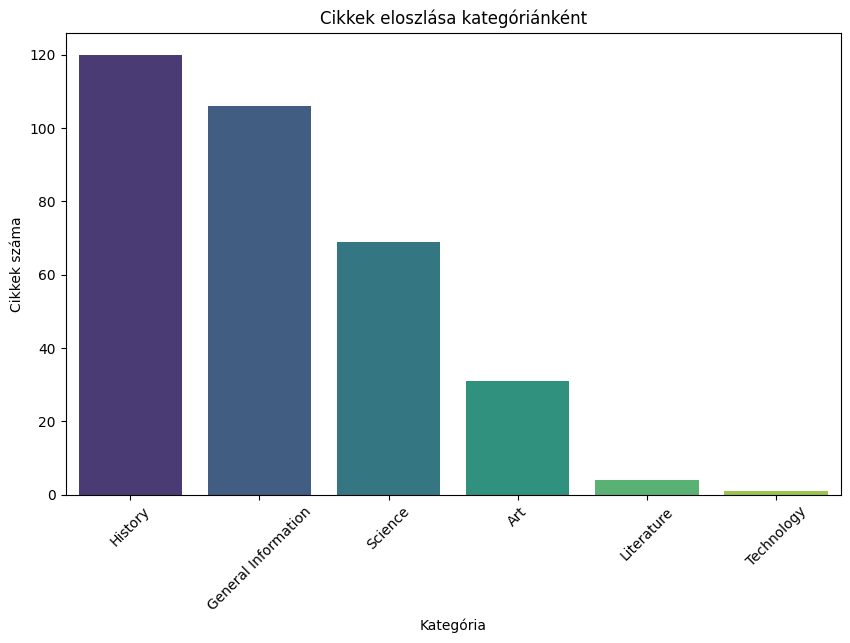

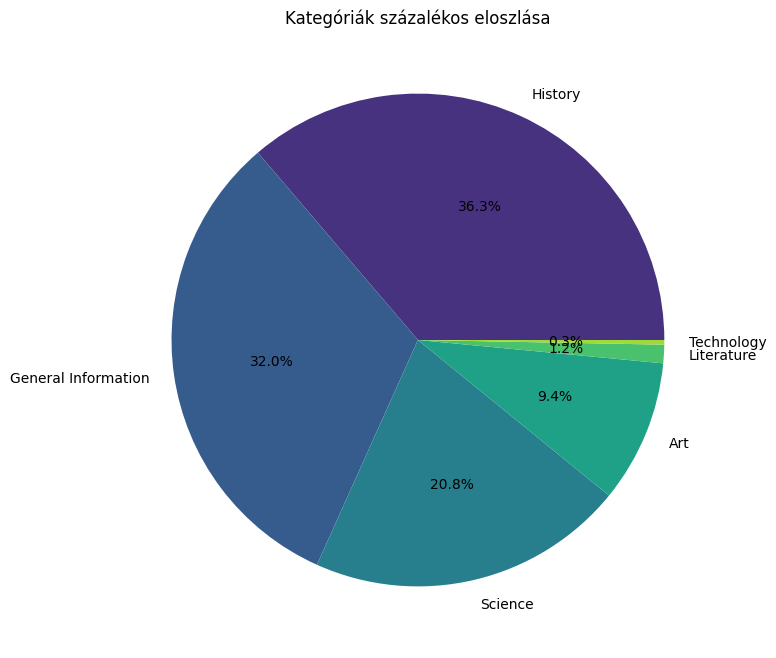

In [3]:

# 📊 Cikkek száma kategóriánként
category_counts = df["category"].value_counts()

# 📌 Oszlopdiagram a kategóriák eloszlására
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Kategória")
plt.ylabel("Cikkek száma")
plt.title("Cikkek eloszlása kategóriánként")
plt.xticks(rotation=45)
plt.show()

# 📌 Kördiagram - kategóriák százalékos eloszlása
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(category_counts)))
plt.title("Kategóriák százalékos eloszlása")
plt.show()



## 🔹 4. Szófelhők generálása kategóriánként

A szófelhők vizualizálják, hogy mely szavak fordulnak elő leggyakrabban az adott kategóriákban.


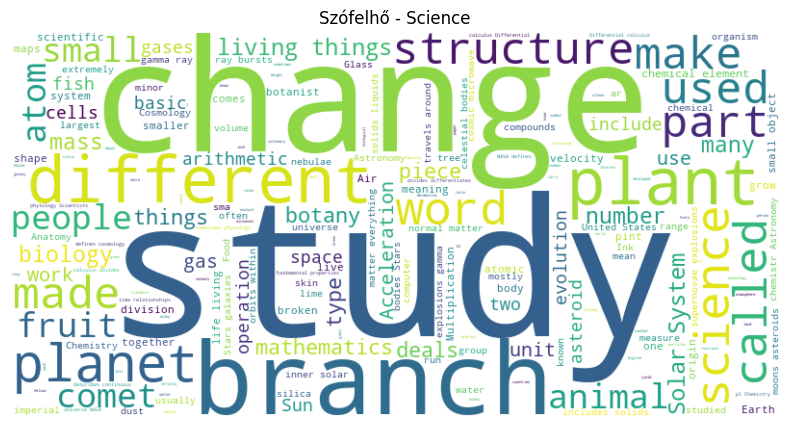

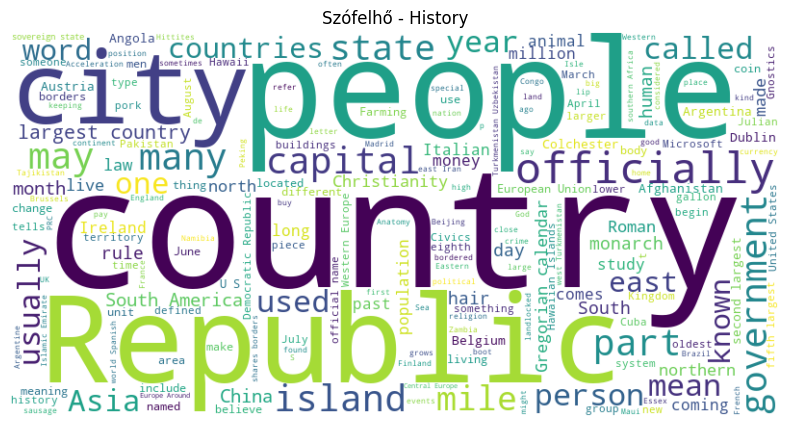

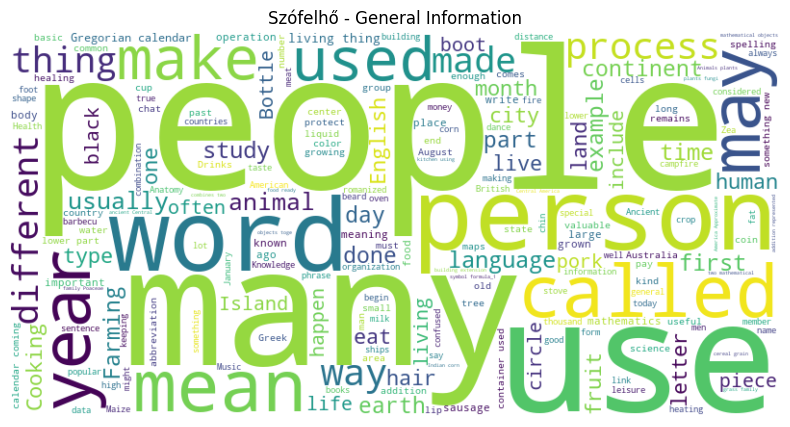

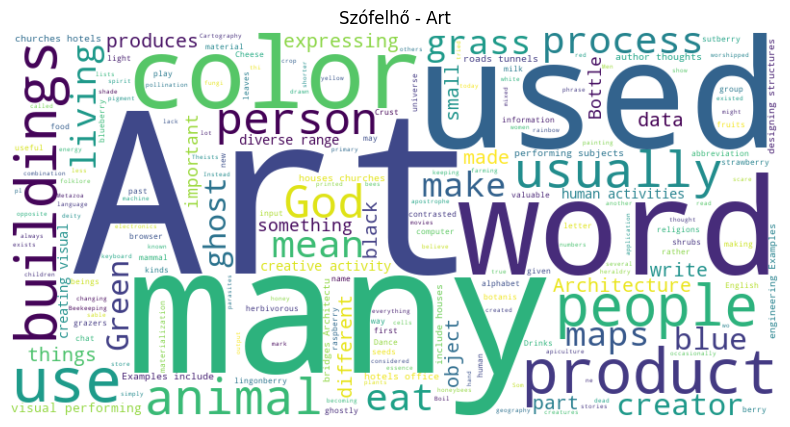

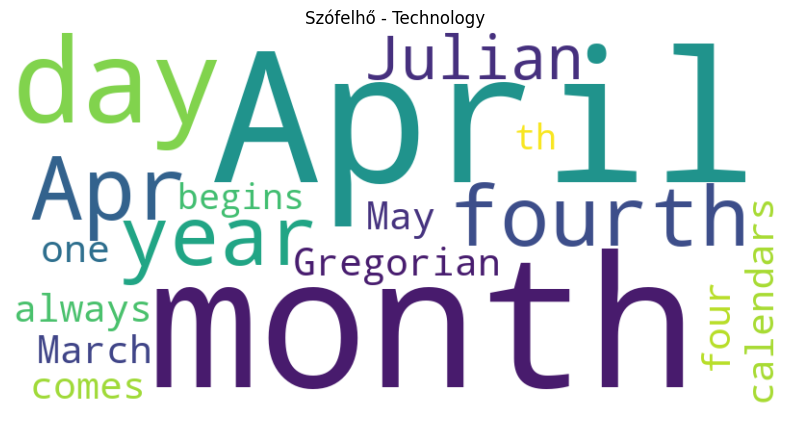

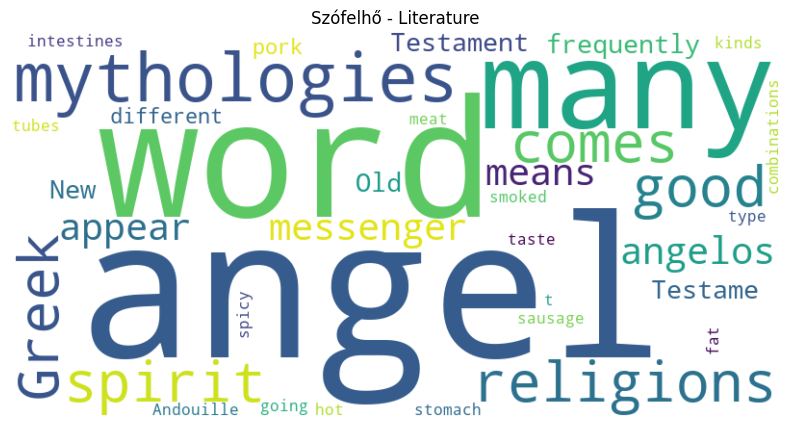

In [4]:

# 📌 Szófelhők generálása minden kategóriához
for category in df["category"].unique():
    text = " ".join(df[df["category"] == category]["content"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Szófelhő - {category}")
    plt.show()



## 🔹 5. Hibás kategorizálások ellenőrzése

Megnézzük, hogy van-e olyan cikk, amely nem a megadott kategóriák valamelyikébe került.


In [5]:

# 📌 Ellenőrzés, hogy minden cikk a megfelelő kategóriába tartozik-e
valid_categories = {"History", "Science", "Art", "Literature", "Technology", "General Information"}
df["is_valid_category"] = df["category"].apply(lambda x: x in valid_categories)

# Hibás kategorizálások megjelenítése, ha vannak
misclassified = df[~df["is_valid_category"]]
if not misclassified.empty:
    print("Hibás kategorizálások találhatók:")
    print(misclassified)
else:
    print("✅ Nincs hibás kategorizálás.")


✅ Nincs hibás kategorizálás.



## 🔹 6. Feldolgozott adatok mentése

Ha szükséges, elmenthetjük a tisztított és ellenőrzött adatokat egy új CSV fájlba.


In [6]:

# 📂 Mentés új CSV fájlba (opcionális)
df.to_csv("Processed_Categorized_Articles.csv", index=False)
print("✅ Az adatok sikeresen elmentve: Processed_Categorized_Articles.csv")


✅ Az adatok sikeresen elmentve: Processed_Categorized_Articles.csv



## 🔹 7. Összegzés

Ebben a notebookban megvizsgáltuk a kategorizált Wikipédia cikkeket:
- Megnéztük az adatok eloszlását.
- Diagramokat generáltunk az eloszlás vizualizálására.
- Szófelhőkkel ábrázoltuk a kategóriánként gyakran előforduló szavakat.
- Ellenőriztük az esetleges hibás kategorizálásokat.

✅ **Az adatelemzés sikeresen befejeződött!** 🚀  
